#Pet classification using CNN

In [ ]:
# To mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# To generate more images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=13,
            width_shift_range=0.3,
            height_shift_range=0.3,
            shear_range=0.2,
            zoom_range=0.1,
            rescale=1./255,
            horizontal_flip=True,
            vertical_flip=True,
            validation_split=0.20,
            fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Pets/train',
                                                 target_size = (128,128),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

Found 40 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Pets/test',
                                            target_size = (128,128),
                                            batch_size = 8,
                                            class_mode = 'categorical')


Found 20 images belonging to 2 classes.


In [ ]:
model=Sequential()
model.add(Conv2D( 32, (5, 5 ), activation = 'relu', padding = 'same', input_shape = (128, 128 , 3 ),kernel_regularizer =tf.keras.regularizers.l2( l=0.03)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (5, 5 ), activation = 'relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.03)))
# model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(32, activation = 'relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.001)))
model.add(Dense(2, activation = 'softmax'))


In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Running for 100 epochs

In [ ]:
! pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from livelossplot import PlotLossesKerasTF

In [ ]:
tf.config.run_functions_eagerly(True)

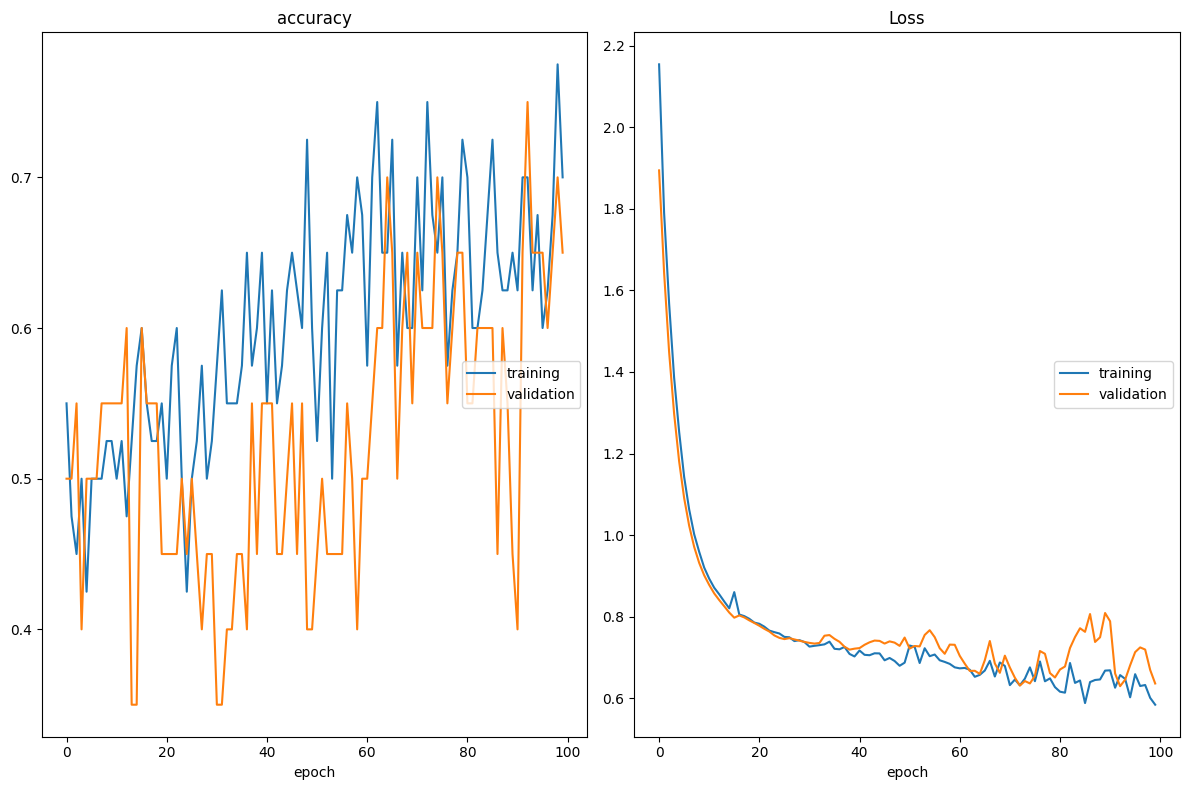

accuracy
	training         	 (min:    0.425, max:    0.775, cur:    0.700)
	validation       	 (min:    0.350, max:    0.750, cur:    0.650)
Loss
	training         	 (min:    0.584, max:    2.154, cur:    0.584)
	validation       	 (min:    0.630, max:    1.894, cur:    0.636)
5/5 [==============================] - 1s 235ms/step - loss: 0.5843 - accuracy: 0.7000 - val_loss: 0.6363 - val_accuracy: 0.6500


In [ ]:
pets=model.fit(training_set,epochs=100,validation_data = test_set,callbacks=[PlotLossesKerasTF()])

Doing hyperparameter tuning and adding l2 regularization

In [ ]:
test_loss, test_accuracy = model.evaluate(test_set)

2/2 [==============================] - 0s 24ms/step - loss: 2.8962 - accuracy: 0.5500


In [ ]:
model1=Sequential()
model1.add(Conv2D( 32, (5, 5 ), activation = 'relu', padding = 'same', input_shape = (128, 128 , 3 ),kernel_regularizer =tf.keras.regularizers.l1( l=0.01)))
# model.add(BatchNormalization())
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(64, (5, 5 ), activation = 'relu',kernel_regularizer =tf.keras.regularizers.l1( l=0.01)))
# model.add(BatchNormalization())
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.4))
model1.add(Flatten())
model1.add(Dense(32, activation = 'relu',kernel_regularizer =tf.keras.regularizers.l1( l=0.01)))
model1.add(Dense(2, activation = 'softmax'))


In [ ]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

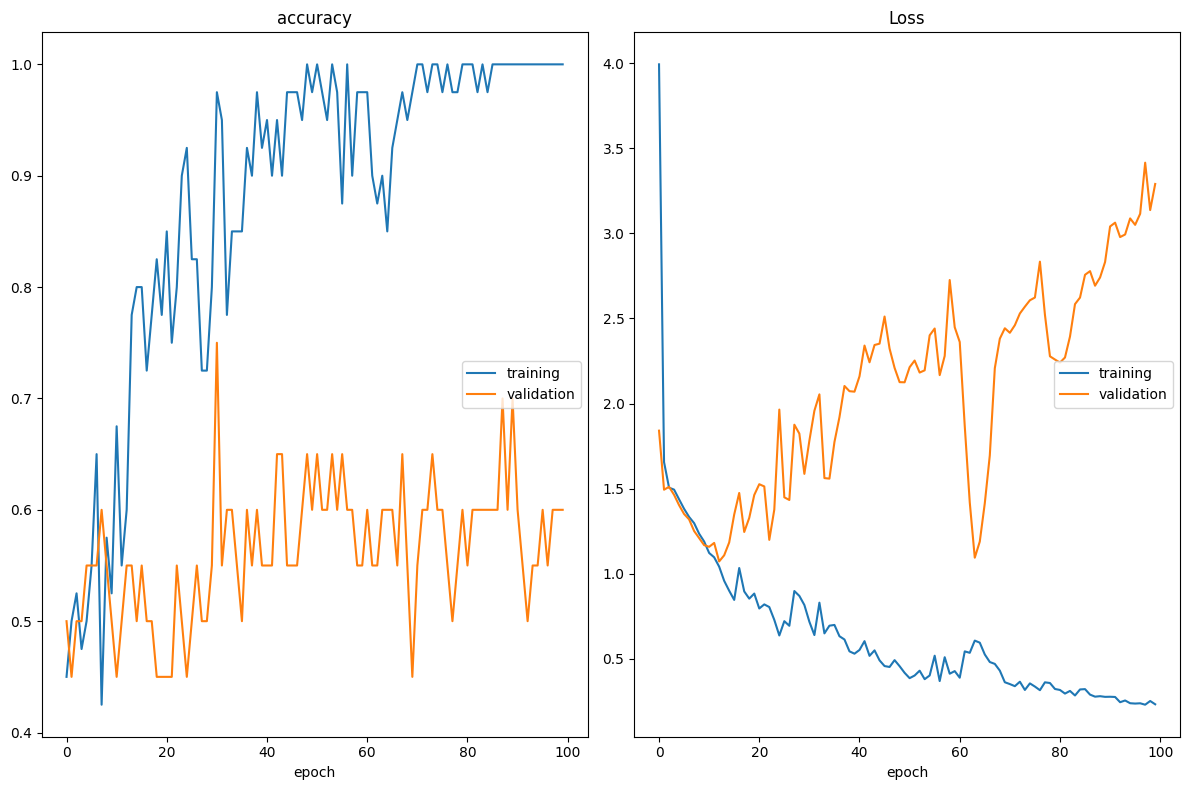

accuracy
	training         	 (min:    0.425, max:    1.000, cur:    1.000)
	validation       	 (min:    0.450, max:    0.750, cur:    0.600)
Loss
	training         	 (min:    0.231, max:    3.992, cur:    0.233)
	validation       	 (min:    1.073, max:    3.415, cur:    3.290)
3/3 [==============================] - 2s 885ms/step - loss: 0.2334 - accuracy: 1.0000 - val_loss: 3.2896 - val_accuracy: 0.6000


In [ ]:
pets=model1.fit(training_set,epochs=100,validation_data = test_set,callbacks=[PlotLossesKerasTF()])

In [ ]:
test_loss, test_accuracy = model1.evaluate(test_set)

2/2 [==============================] - 0s 31ms/step - loss: 3.2896 - accuracy: 0.6000


#Running for 200 epochs

In [ ]:
model2=Sequential()
model2.add(Conv2D( 32, (5, 5 ), activation = 'relu', padding = 'same', input_shape = (256,  256 , 3 )))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(64, (5, 5 ), activation = 'relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
# model2.add(BatchNormalization())
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(32, activation = 'relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
# model2.add(BatchNormalization())
model2.add(Dense(2, activation = 'softmax'))


In [ ]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

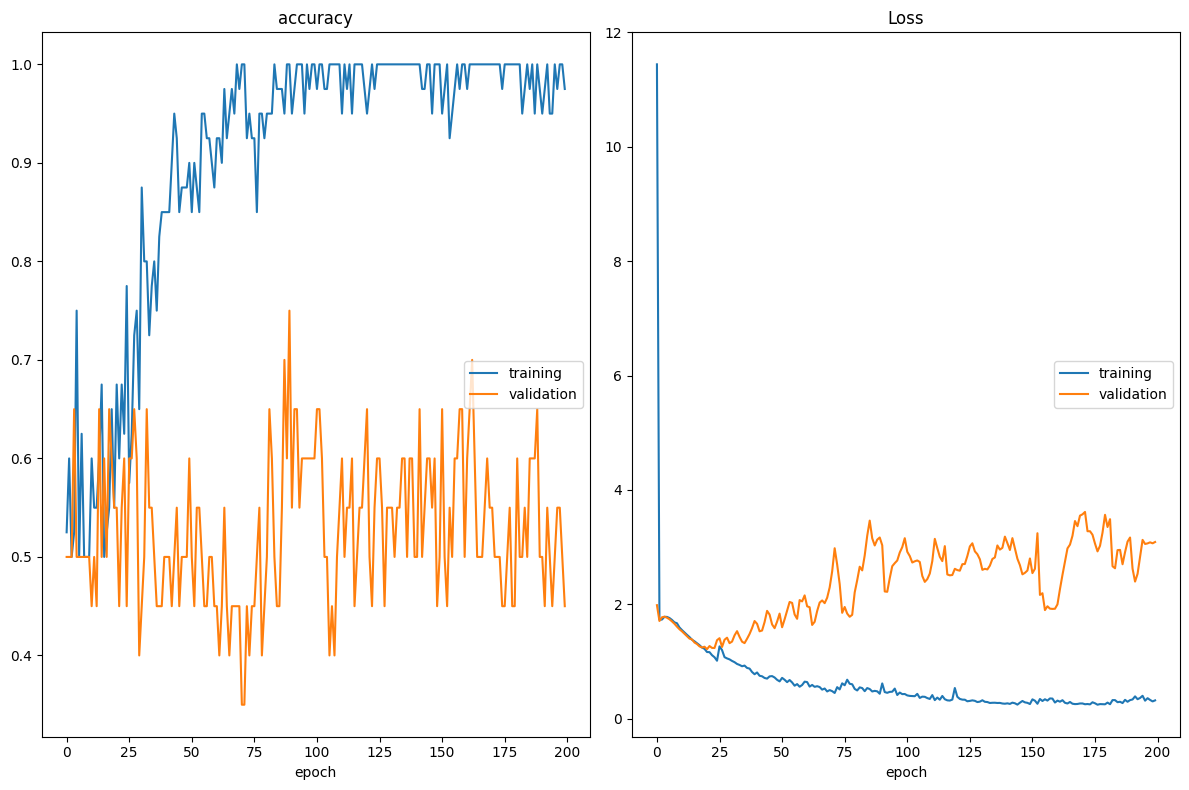

accuracy
	training         	 (min:    0.500, max:    1.000, cur:    0.975)
	validation       	 (min:    0.350, max:    0.750, cur:    0.450)
Loss
	training         	 (min:    0.242, max:   11.443, cur:    0.318)
	validation       	 (min:    1.213, max:    3.614, cur:    3.088)
3/3 [==============================] - 2s 789ms/step - loss: 0.3180 - accuracy: 0.9750 - val_loss: 3.0880 - val_accuracy: 0.4500


In [ ]:
pets=model2.fit(training_set,epochs=200,validation_data = test_set,callbacks=[PlotLossesKerasTF()])

In [ ]:
test_loss, test_accuracy = model2.evaluate(test_set)

2/2 [==============================] - 0s 25ms/step - loss: 3.0880 - accuracy: 0.4500


#Running for 300 epochs

trying without regularization and using sgd optimizer

In [ ]:
model3=Sequential()
model3.add(Conv2D( 32, (5, 5 ), activation = 'relu', padding = 'same', input_shape = (256,  256 , 3 )))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(64, (5, 5 ), activation = 'relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
# model2.add(BatchNormalization())
model3.add(MaxPooling2D((2,2)))
model3.add(Dropout(0.4))
model3.add(Flatten())
model3.add(Dense(32, activation = 'relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
# model2.add(BatchNormalization())
model3.add(Dense(2, activation = 'softmax'))


In [ ]:
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

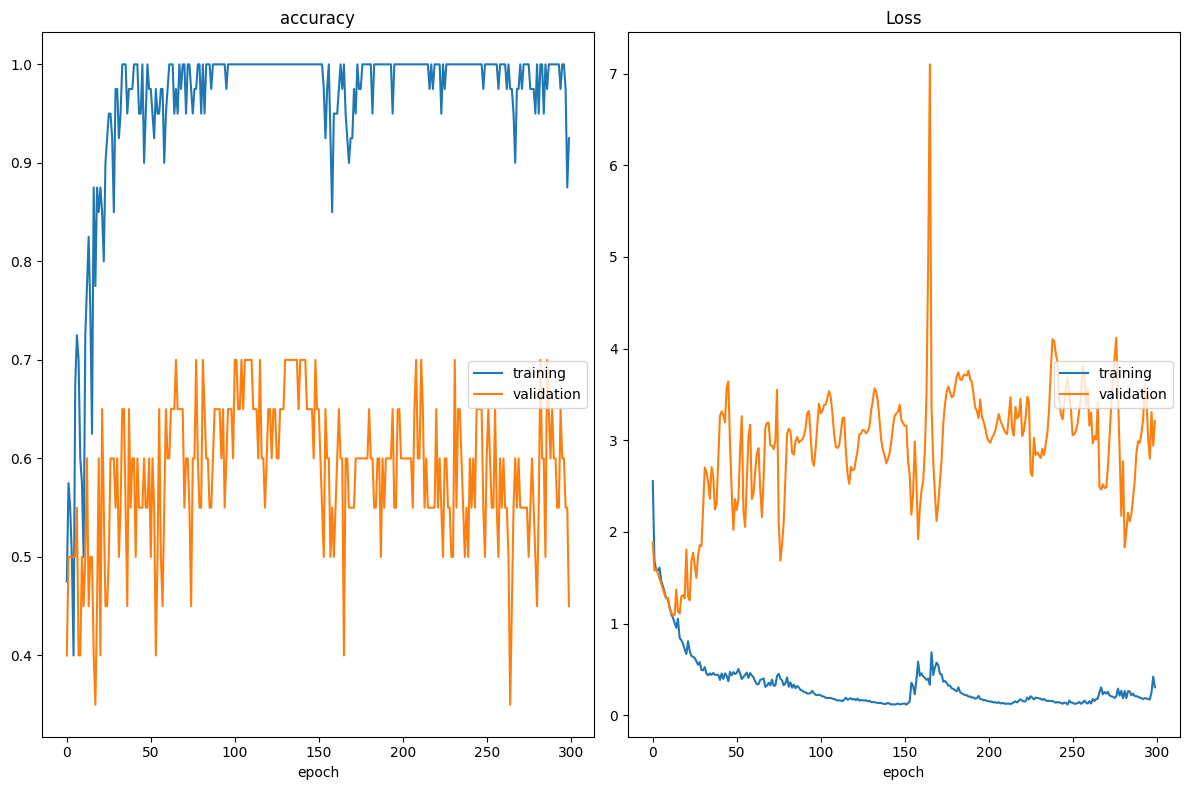

accuracy
	training         	 (min:    0.400, max:    1.000, cur:    0.925)
	validation       	 (min:    0.350, max:    0.700, cur:    0.450)
Loss
	training         	 (min:    0.115, max:    2.554, cur:    0.306)
	validation       	 (min:    1.090, max:    7.101, cur:    3.210)
3/3 [==============================] - 1s 531ms/step - loss: 0.3060 - accuracy: 0.9250 - val_loss: 3.2102 - val_accuracy: 0.4500


In [ ]:
pets=model3.fit(training_set,epochs=300,validation_data = test_set,callbacks=[PlotLossesKerasTF()])

In [ ]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

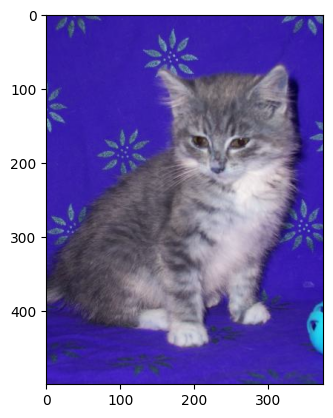

1/1 [==============================] - 0s 137ms/step
['cat']


In [ ]:
image = '/content/gdrive/MyDrive/Pets/test/cats/110.jpg'
img = cv2.imread(image)
plt.imshow(img)
plt.show()
img = cv2.resize(img,(256,256))
img = np.reshape(img, (1, 256,256, 3))
# classes = model3.predict_classes(img)
predict_x=model3.predict(img)
classes_x=np.argmax(predict_x,axis=1)
classes=["cat" if classes_x==0 else "dog"]
print(classes)

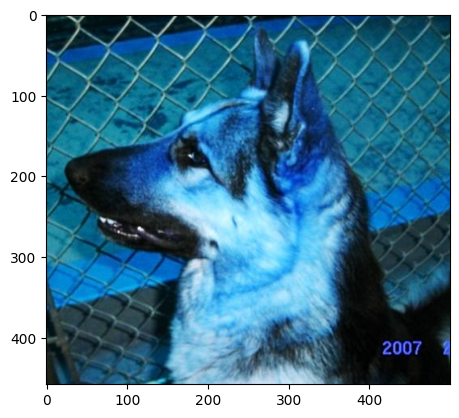

1/1 [==============================] - 0s 95ms/step
['dog']


In [ ]:
image = '/content/gdrive/MyDrive/Pets/test/dogs/107.jpg'
img = cv2.imread(image)
plt.imshow(img)
plt.show()
img = cv2.resize(img,(256,256))
img = np.reshape(img, (1, 256,256, 3))
# classes = model3.predict_classes(img)
predict_x=model3.predict(img)
classes_x=np.argmax(predict_x,axis=1)
classes=["dog" if classes_x==1 else "cat"]
print(classes)